In [1]:
import os
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits import mplot3d
from collections import defaultdict
plt.rcParams.update({'font.size': 15})

In [8]:
class Trajectory:
    def __init__(self, experiment):
        self.current_goal_state = None
        self.experiment = experiment
        self.goal_states = [
            [28.94, 79.0, -21.95],
            [49.76, 96.85, 36.43],
            [-45.50, 108, 1.45],
        ]
        self.initial_position = np.array([-0.5, 96. ,  1.5], dtype=np.float32)
        
        self.hist_gstate = defaultdict(int)
        
        # raw data
        self.data = self.load_data()
        # data organized by goal states
        self.data_list = self.dict2list()
        # all trajectories together
        self.data_reshaped = self.list_reshape()
        
        
        
    def load_data(self):
        data = defaultdict(list)
        for file in os.listdir(f"../results/{self.experiment}/"):
            if 'coord' in file:
                
                goal_state = int(file.split('_')[1][0])
                self.hist_gstate[goal_state] += 1
                
                with open(f"../results/{self.experiment}/{file}") as csv_file:
                    trajectory = []
                    csv_reader = csv.reader(csv_file, delimiter=',')
                    line_count = 0
                    for i, row in enumerate(csv_reader):
                        trajectory.append(row)
                data[goal_state].append(trajectory)
        return data
    
    def dict2list(self):
        return [d for d in self.data.values()]
    
    def list_reshape(self):
        return [j for d in self.data_list for j in d]
    
    # 2D stuff ------------------------
    
    def plot_goal_states_2d(self, ax):
        for i,(x,_,y) in enumerate(self.goal_states):
            if self.current_goal_state == i:
                ax.plot(x, y, marker='o', color='blue', markersize=13)
            else:
                ax.plot(x, y, marker='o', color='black', markersize=10)
            text = '   ' + str(x) + ', ' + str(y) 
            ax.text(x, y, text)
            
            
    def plot_init_state_2d(self, ax):
        x,_,y = self.initial_position
        ax.plot(x,y, marker='o', markersize=10)
        text = '   ' + str(x) + ', ' + str(y)
        ax.text(x, y, text)
        
        
    def plot_2d(self, traj, ax):
        d = np.array(traj, dtype=np.float32)
        ax.plot(d[:,0], d[:,2])    
    
    
    # ---------------------------------
    

    
    
    # PLOT HELPERS
    
    def plot_goal_states(self, ax):
        for i,(x,y,z) in enumerate(self.goal_states):
            if self.current_goal_state == i:
                ax.plot(x, y, z, marker='o', color='blue', markersize=13)
            else:
                ax.plot(x, y, z, marker='o', color='black', markersize=10)
            text = '   ' + str(x) + ', ' + str(y) + ', ' + str(z)
            ax.text(x, y, z, text)    
    
    def plot_init_state(self, ax):
        x,y,z = self.initial_position
        ax.plot(x,y,z, marker='o', markersize=10)
        text = '   ' + str(x) + ', ' + str(y) + ', ' + str(z)
        ax.text(x, y, z, text)
        

        
    def plot_trajectory(self, traj, ax):
        d = np.array(traj, dtype=np.float32)
        ax.plot3D(d[:,0], d[:,1], d[:,2])
        
    def plot_point(self, point, ax):
        x,y,z = point
        ax.plot(x, y, z, color='blue', marker='.', markersize=1)
        
        
    def plot_list(self, traj_list, ax):
        for traj in traj_list:
            self.plot_trajectory(traj, ax)
            
    def plot_labels(self, ax):
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
    
    def plot_standard(self, ax):
        self.plot_goal_states(ax)
        self.plot_init_state(ax)
        self.plot_labels(ax)
        
    # PLOT FUNCTIONS
    def plot_2d_trajectory(self):
        fig, ax = plt.subplots(figsize=(15,15))
        for traj in self.data_reshaped:
            self.plot_2d(traj, ax)
            
        ax.set_xlabel('x')
        ax.set_ylabel('z')
        self.plot_init_state_2d(ax)
        self.plot_goal_states_2d(ax)
        
    def plot_per_goal_state(self):
        fig = plt.figure(figsize=(20,20))
        for i, goal_state in enumerate(self.data_list):
            self.current_goal_state = i
            ax = fig.add_subplot(2, 2, i+1, projection='3d')
            #ax = plt.axes(111, projection='3d')
            for traj in goal_state:
                self.plot_trajectory(traj, ax)
            
            self.plot_standard(ax)
        self.current_goal_state = None

            
    def plot_all_together(self):
        fig, ax = plt.subplots(figsize=(15,15))
        ax = plt.axes(projection='3d')
        for traj in self.data_reshaped:
            self.plot_trajectory(traj, ax)
            
        self.plot_standard(ax)
        
    def plot_pointcloud(self):
        fig, ax = plt.subplots(figsize=(15,15))
        ax = plt.axes(projection='3d')
        for traj in self.data_reshaped:
            traj = np.array(traj, dtype=np.float32)
            for point in traj:
                self.plot_point(point, ax)

        self.plot_standard(ax)
    

## Example plot / goal_state

In [140]:
experiment = '95beb1e0807db3d2c4245102d25ec67f23477167-00000000-e905932d'

t = Trajectory(experiment)

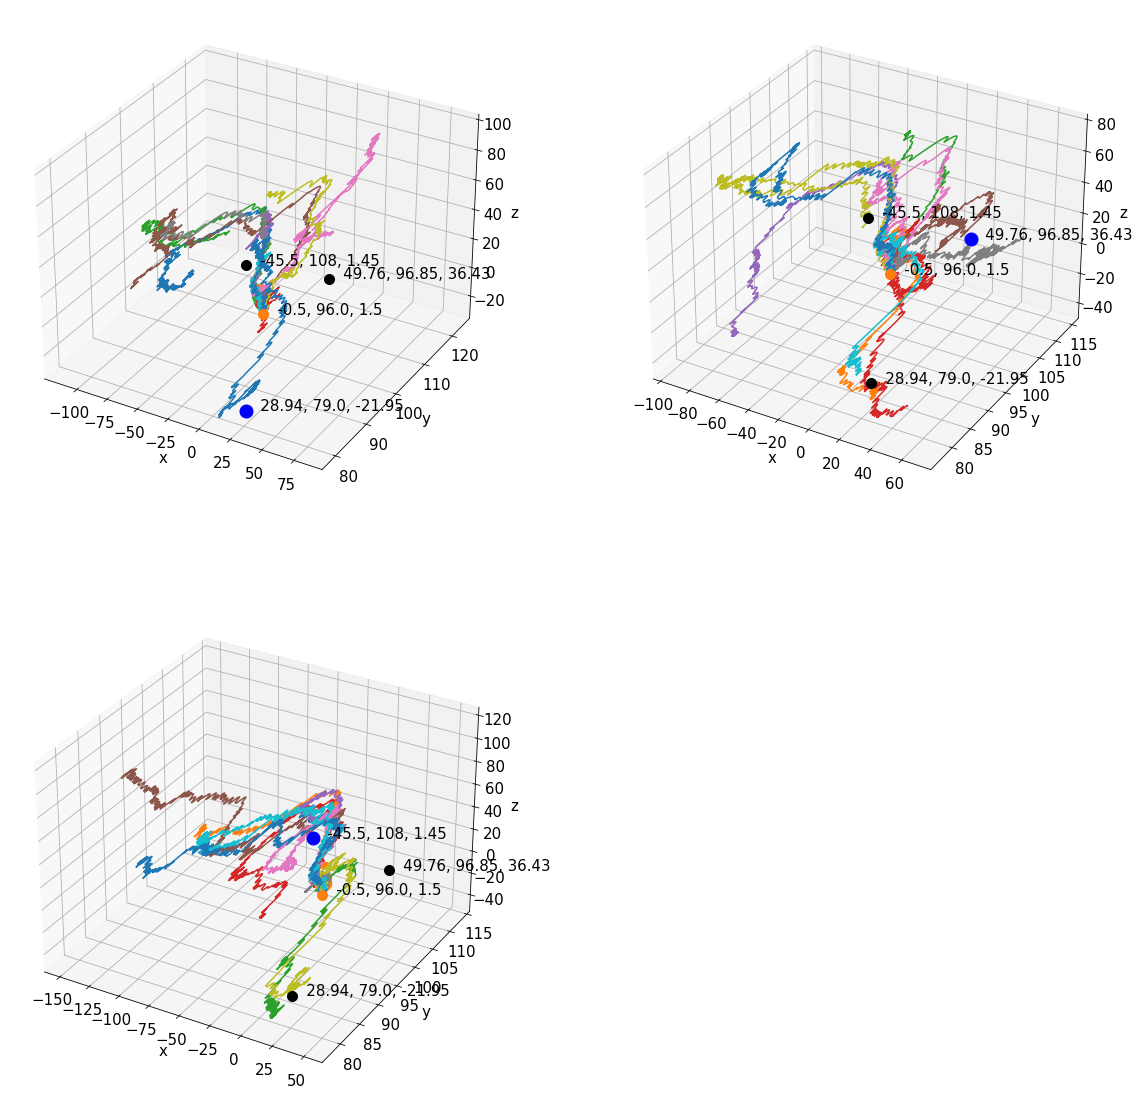

In [141]:
t.plot_per_goal_state()

## Example plot all together

In [61]:
experiment = 'ed8c06ff3eb433f78f31b4c41b5101571c510aa2-dd73ff79-50ea45d3'

t = Trajectory(experiment)

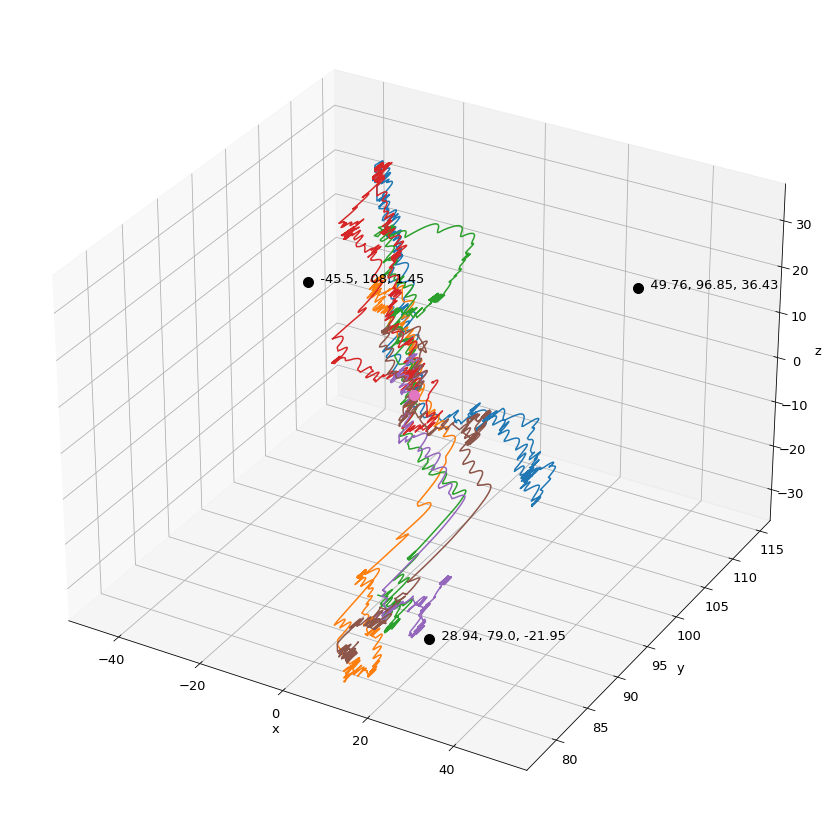

In [62]:
t.plot_all_together()

## Example point cloud

In [70]:
experiment = 'ed8c06ff3eb433f78f31b4c41b5101571c510aa2-dd73ff79-50ea45d3'

t = Trajectory(experiment)

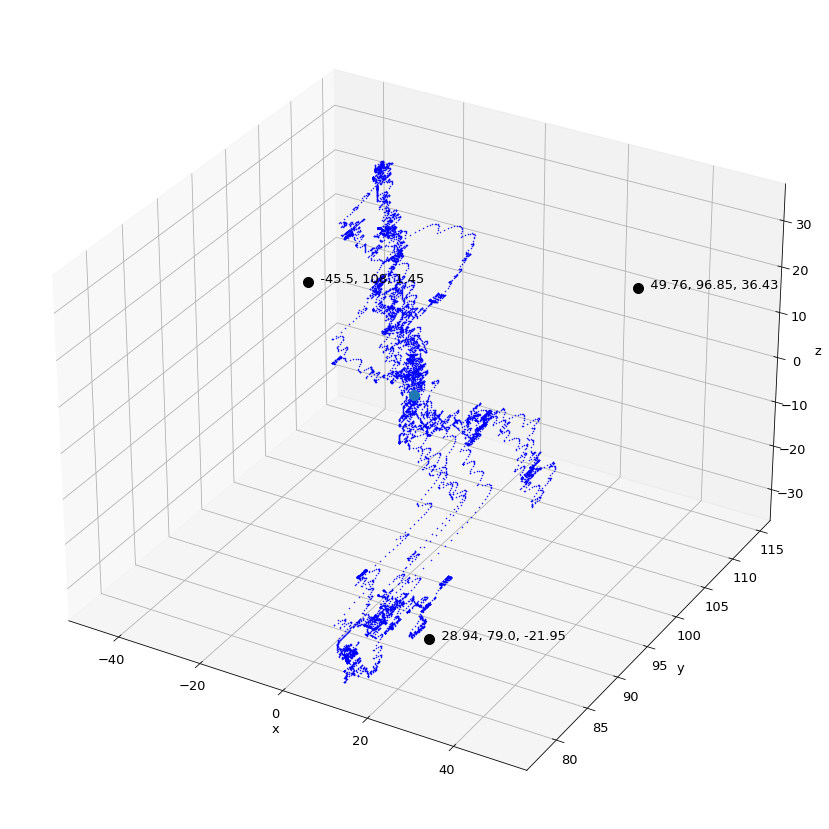

In [71]:
t.plot_pointcloud()

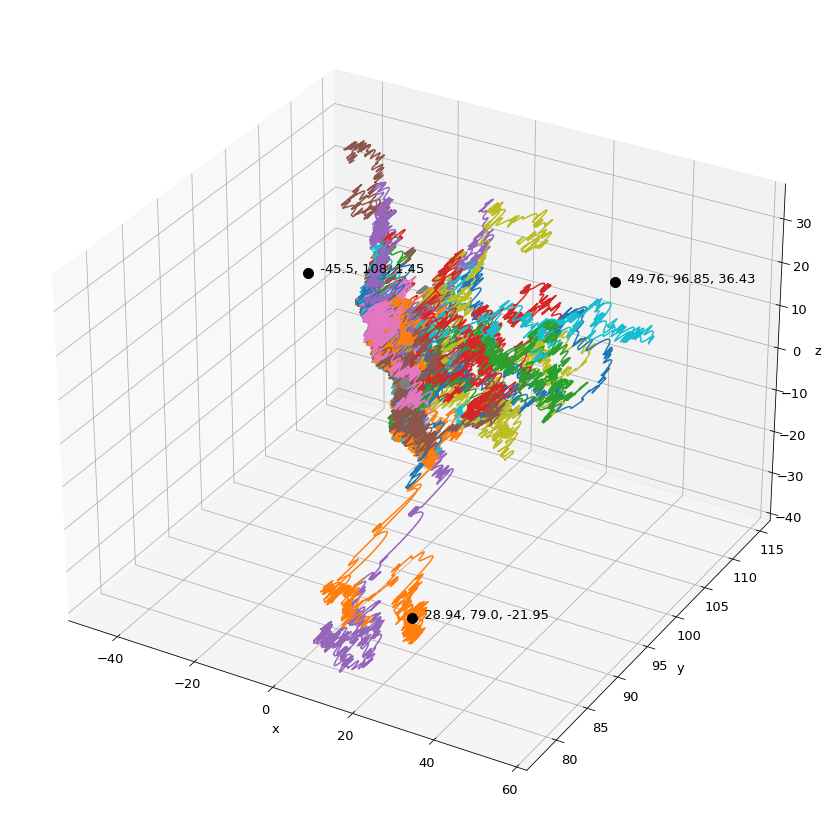

In [126]:
experiment = 'kmeans_50'
t0 = Trajectory(experiment)
t0.plot_all_together()

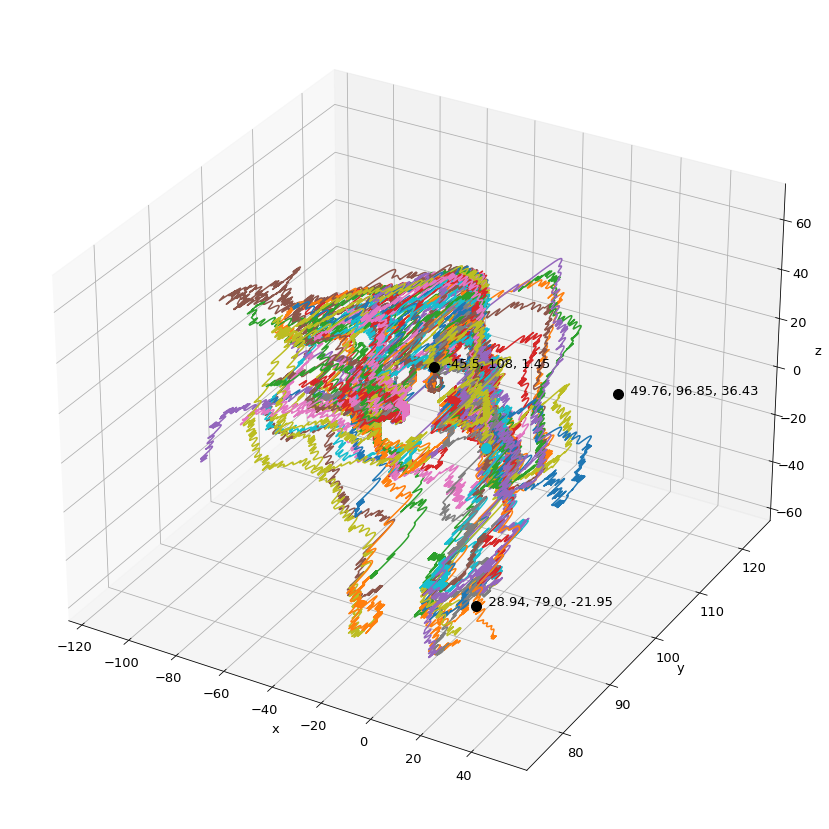

In [82]:
experiment = 'kmeans_30'
t1 = Trajectory(experiment)
t1.plot_all_together()

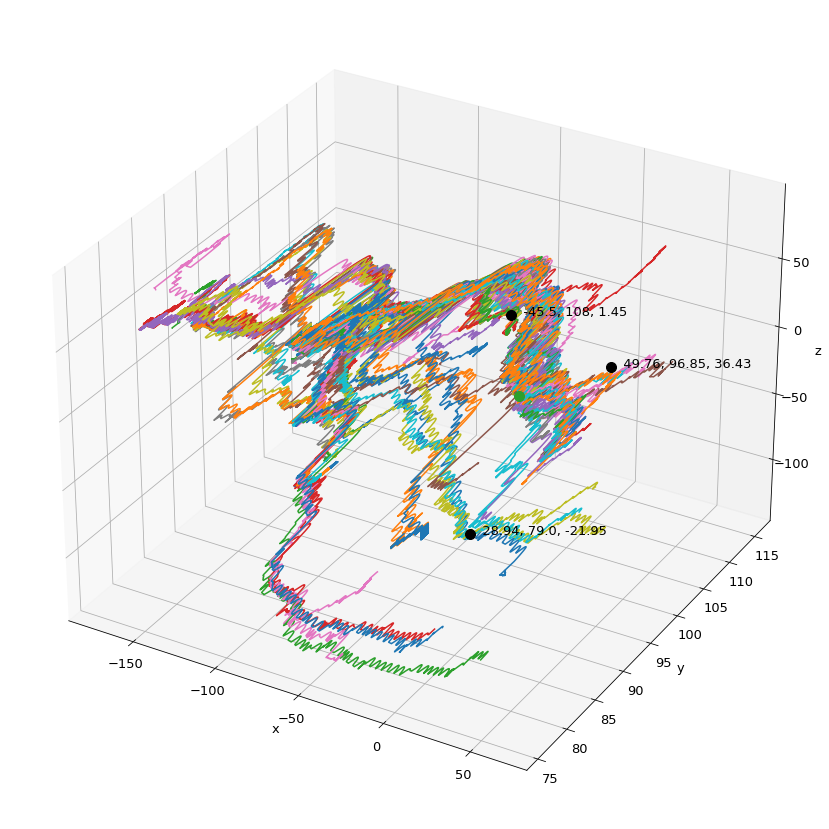

In [83]:
experiment = 'kmeans_10'
t2 = Trajectory(experiment)
t2.plot_all_together()

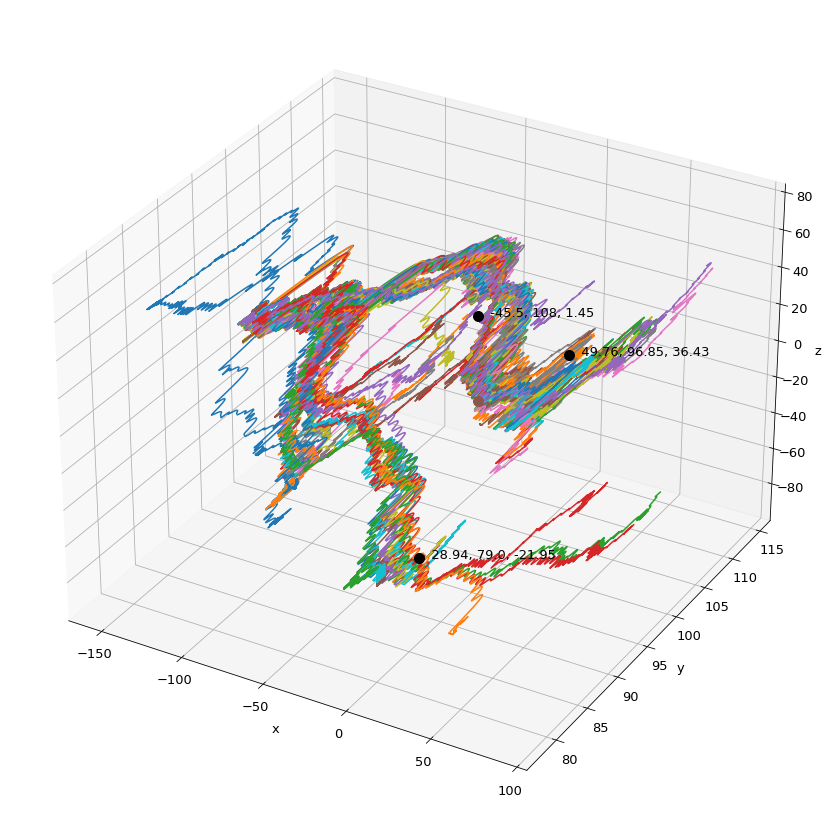

In [91]:
experiment = 'kmeans_4'
t3 = Trajectory(experiment)
t3.plot_all_together()

## Evaluating training conditioned on the 3 goal states

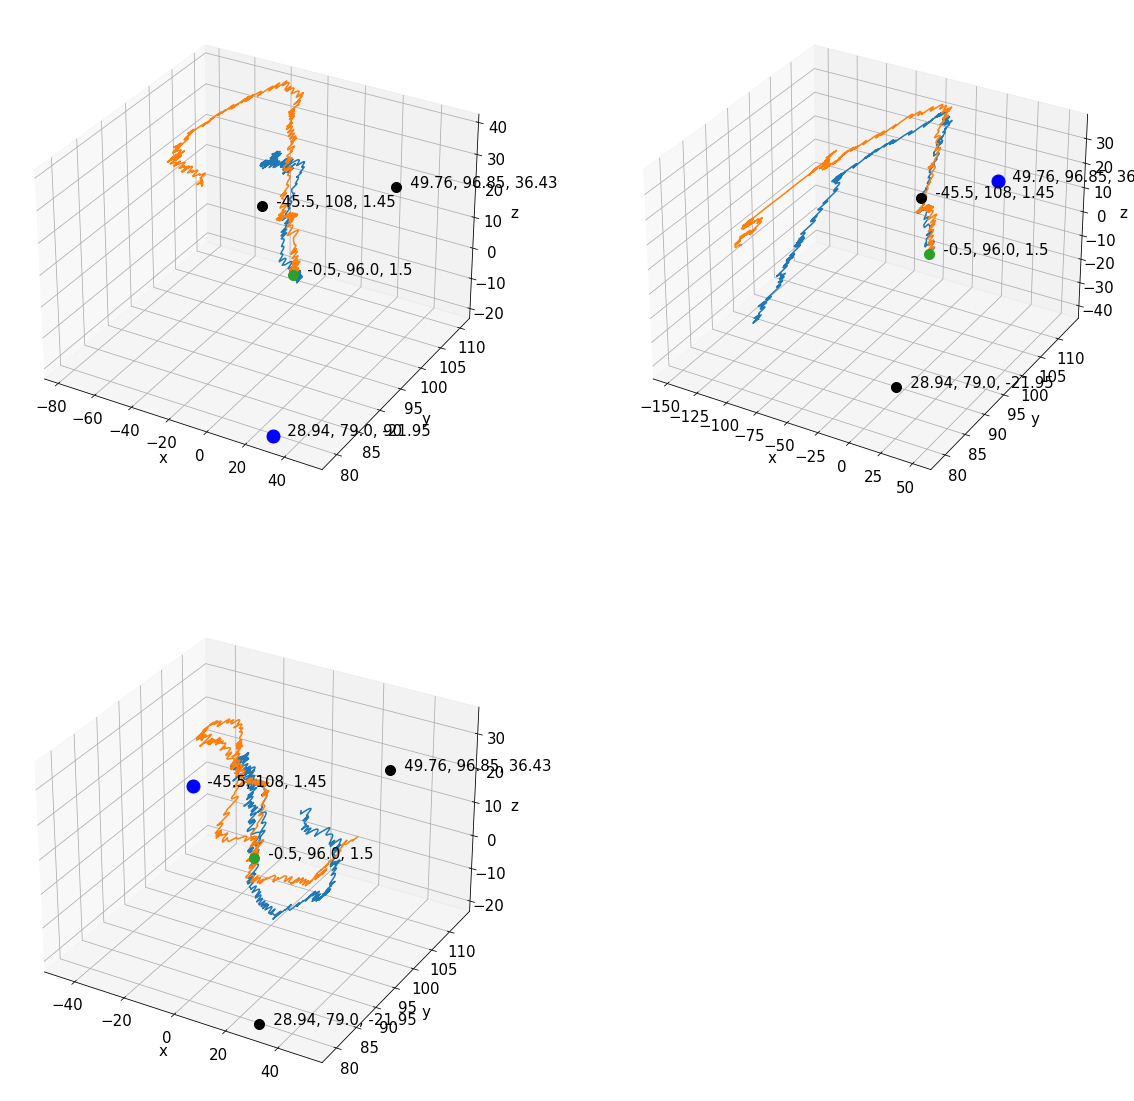

In [136]:
experiment = '95beb1e0807db3d2c4245102d25ec67f23477167-43ebc5e1-50ea45d3'
t4 = Trajectory(experiment)
t4.plot_per_goal_state()

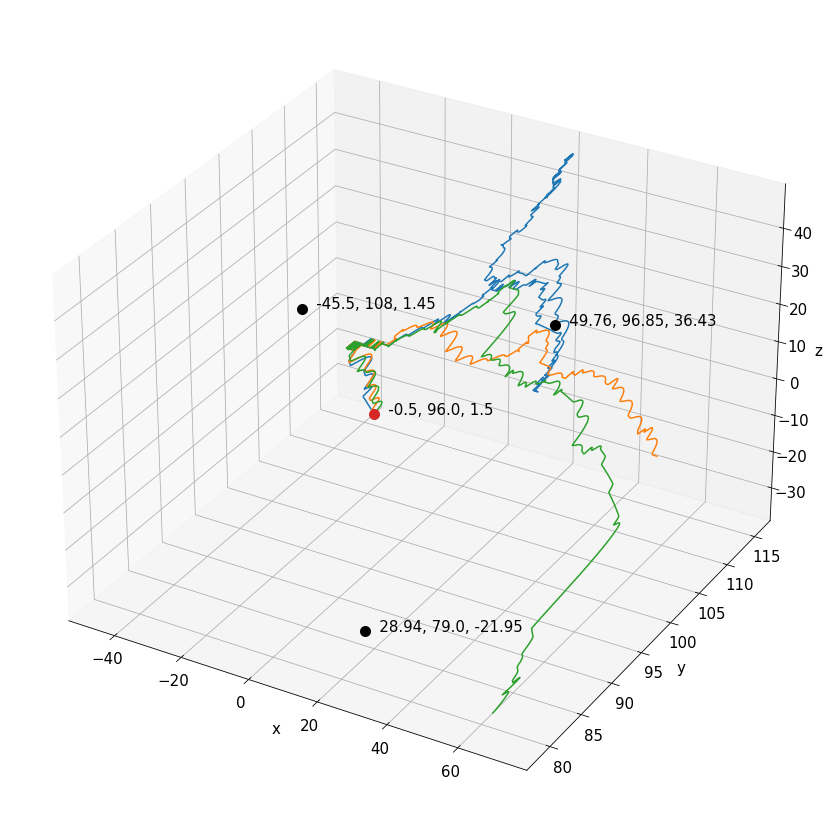

In [133]:
experiment = 'eval_3'
t4 = Trajectory(experiment)
t4.plot_all_together()

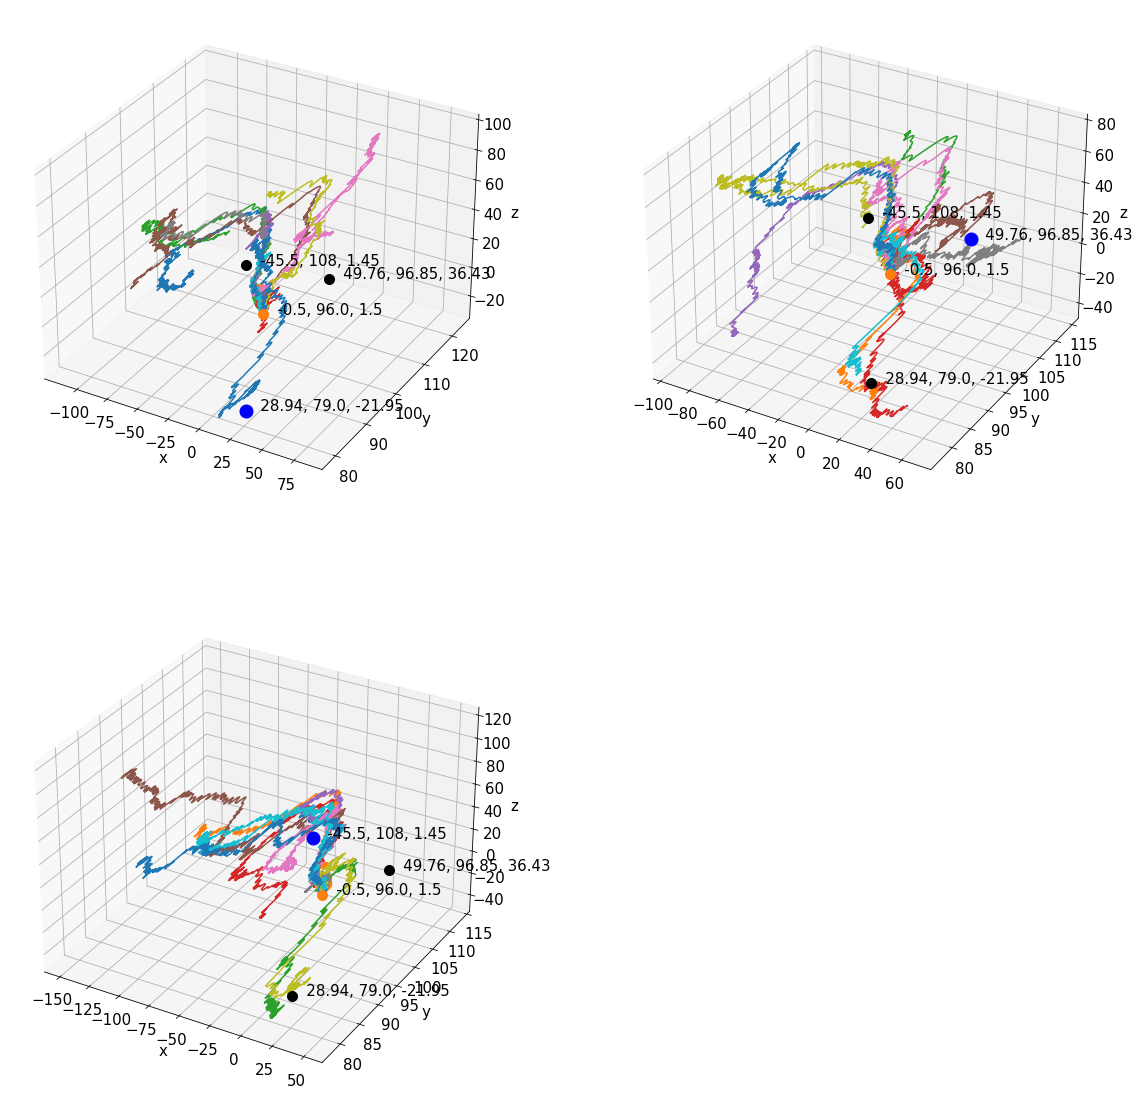

In [137]:
experiment = '95beb1e0807db3d2c4245102d25ec67f23477167-00000000-e905932d'
t4 = Trajectory(experiment)
t4.plot_per_goal_state()

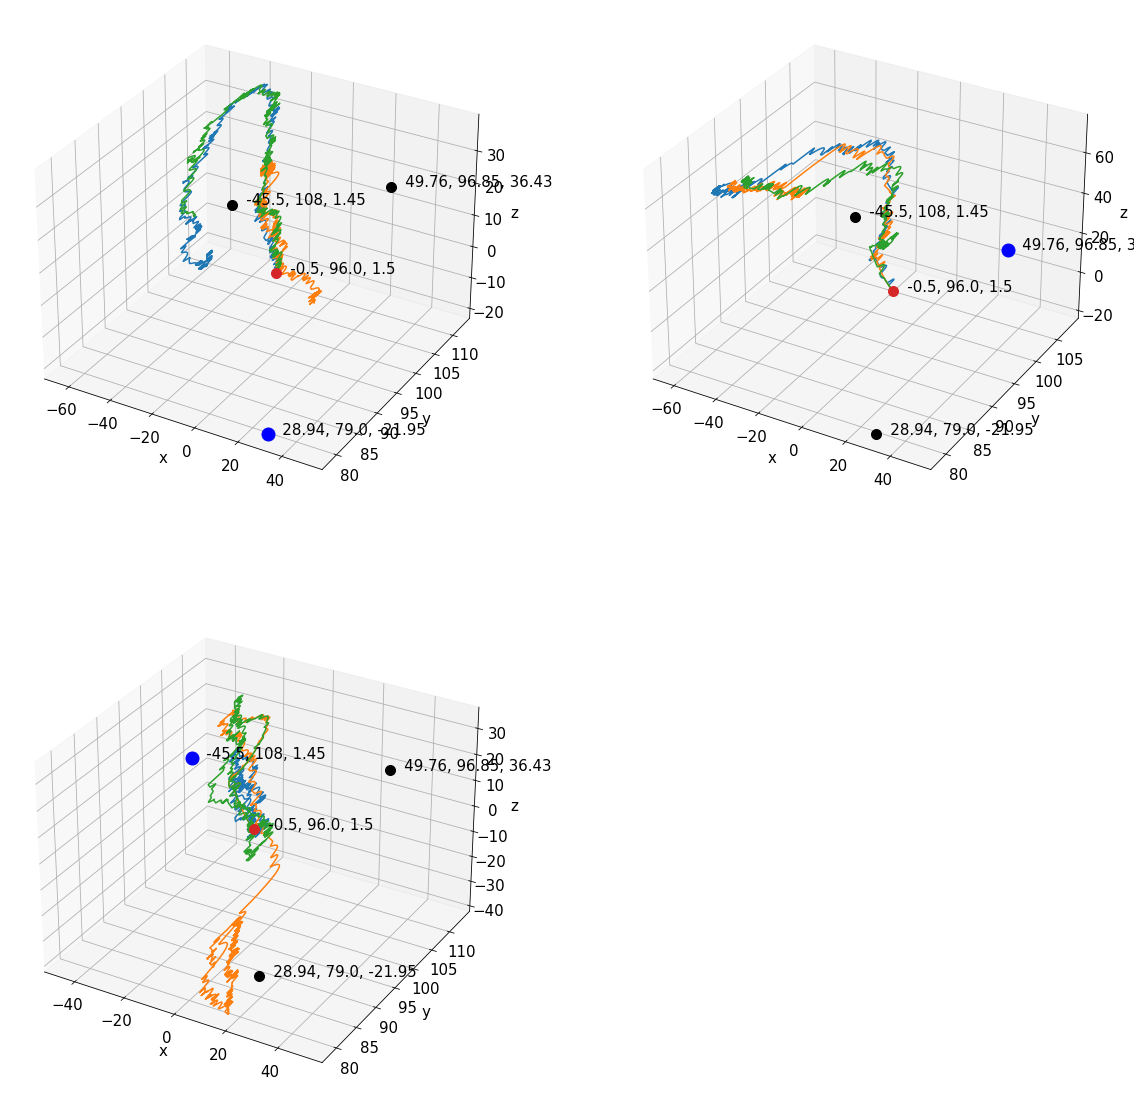

In [138]:
experiment = '95beb1e0807db3d2c4245102d25ec67f23477167-e6d7327f-9c76e63e'
t5 = Trajectory(experiment)
t5.plot_per_goal_state()

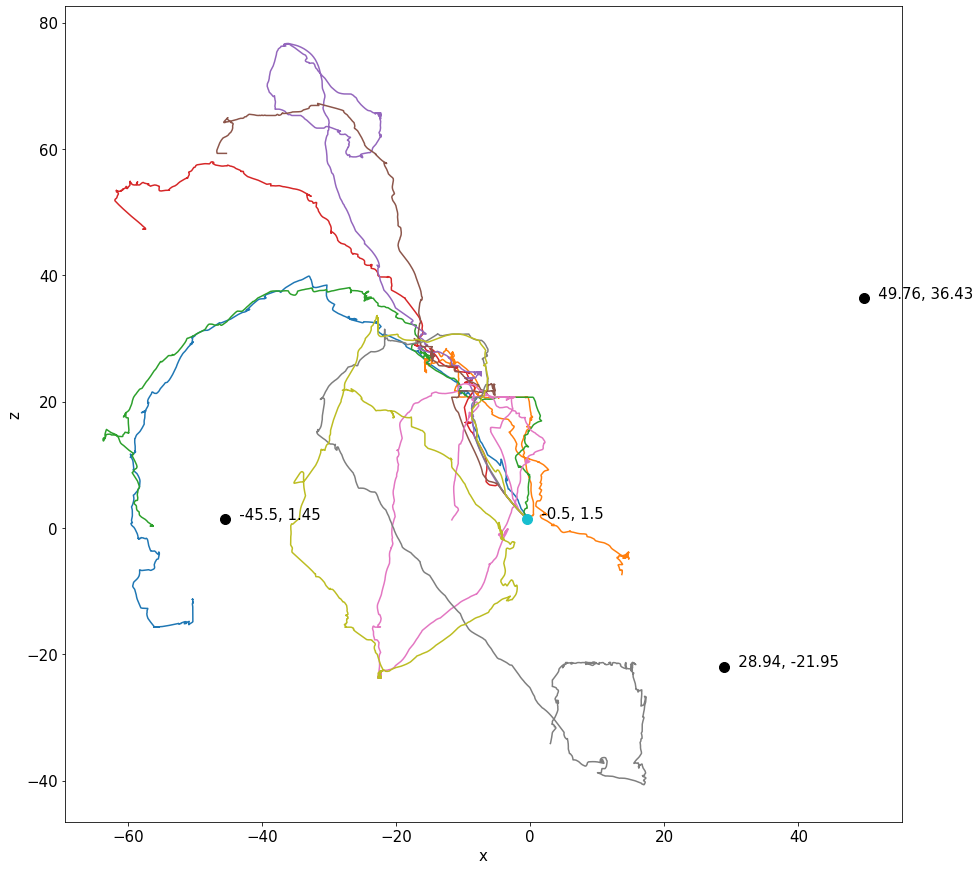

In [9]:
experiment = '95beb1e0807db3d2c4245102d25ec67f23477167-e6d7327f-9c76e63e'
t6 = Trajectory(experiment)
t6.plot_2d_trajectory()